<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA </font> </center>
# <center> <font color= #000047> Simulación Matemática </font> </center>
# <center> <font color= #000047> EXAMEN 1 : Optimización </font> </center>
# <center> <font color= #000047> Tipo: B </font> </center>

        

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Asegúrese de escribir su nombre, y el código en las celdas comentadas.</div>

<h1> Nombres: Héctor Manuel Serrano Sandoval 738867</h1>
<hr>   

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este archivo cuando se haga entrega del examen. Es necesario adjuntar las diferentes librerías o código que se utilice para la realización del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (3 ptos)](#Problema1)
2. [Reactivo 2 (3 ptos)](#Problema2)
3. [Reactivo 3 (4 ptos)](#Problema3)
<hr>   

<hr>   

### Reactivo 1 (3 ptos) <a name="Problema1"></a> 

En un almacén de frutas hay 800 kg de naranjas, 800 kg de manzanas y 500 kg de plátanos. Para
su venta se hacen dos tipos de lotes (A y B). El lote A contiene 1 kg de naranjas, 2 kg de manzanas y 1 kg de
plátanos; el lote B se compone de 2 kg de naranjas, 1 kg de manzanas y 1 kg de plátanos. El beneficio
por kilogramo que se obtiene con el lote A es de 1200 u.m. y con el lote B de 1400 u.m. 

In [1]:
import pandas as pd
df = pd.DataFrame(columns=['Naranjas', 'Manzanas', 'Plátanos'], index = ['Lote A','Lote B', 'Existencia en Almacén'])
df.loc['Lote A', :] = ['1 Kg', '2 Kg', '1 Kg']
df.loc['Lote B', :] = ['2 Kg', '1 Kg', '1 Kg']
df.loc['Existencia en Almacén', :] = ['800 Kg', '800 Kg', '500 Kg']
df

,Naranjas,Manzanas,Plátanos
Lote A,1 Kg,2 Kg,1 Kg
Lote B,2 Kg,1 Kg,1 Kg
Existencia en Almacén,800 Kg,800 Kg,500 Kg


In [2]:
df_beneficios = pd.DataFrame(columns=['Beneficios'], index = ['Lote A','Lote B'])
df_beneficios.loc['Lote A', :] = ['1200 u.m']
df_beneficios.loc['Lote B', :] = ['1400 u.m']
df_beneficios

,Beneficios
Lote A,1200 u.m
Lote B,1400 u.m


**Determinar el
número de kilogramo de cada tipo para conseguir beneficios máximos.**

> **1.1.-** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

>proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en $\LaTeX$ el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).



Para resolver este problema voy a definir mis variables

x= Lotes A

y= Lotes B

Una vez con nuestras variables tendremos la función a maximizar $1200x+1400y$

Tenemos como restricciones:

Naranjas: x+2y<=800

Manzanas: 2x+y<=800

Plátanos: x+y<=500

x>=0

y>=0

In [3]:
import numpy as np
from scipy import optimize as opt

In [4]:
c = np.array([-120,-140])

A_ineq = np.array([[1,2],
                  [2,1],
                  [1,1],
                  [-1,0],
                  [0,-1]])

b_ineq = np.array([800,800,500,0,0])

>**1.2.-** Resuelva el problema utilizando la función `linprog`. ¿Cuál es el número de kilogramo de cada tipo (A y B) para conseguir beneficios máximos?

In [5]:
solucion = opt.linprog(c=c, A_ub=A_ineq, b_ub=b_ineq)
solucion

     con: array([], dtype=float64)
     fun: -65999.99107577653
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.09006686e-04, 1.00000093e+02, 6.74408976e-05, 1.99999974e+02,
       2.99999958e+02])
  status: 0
 success: True
       x: array([199.99997412, 299.99995843])

In [6]:
solucion.x

array([199.99997412, 299.99995843])

In [7]:
np.round(solucion.x)

array([200., 300.])

In [8]:
(1200*200)+(1400*300)

660000

* Para obtrener la mayor cantidad de beneficios se necesitarán $200$ lotes tipo A y $300$ lotes tipo B, el beneficio máximo será $660000 u.m$

<hr>   

### Reactivo 2 (3 ptos) <a name="Problema2"></a> 


Considere los datos que se encuentran en el dataset `Position_Salaries.csv`, este dataset contiene los salarios según el nivel del empleado en dentro de una empresa.

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


>**2.1.-** Usando la variable `level` como variable independiente $x$ y el salario (`Salary`) como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 4. Mostrar en un solo gráfico los datos del archivo contra los niveles, y los polinomios ajustados.


In [11]:
import matplotlib.pyplot as plt
from scipy import optimize as opt

In [12]:
x = df['Level'].values
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
y = df['Salary'].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

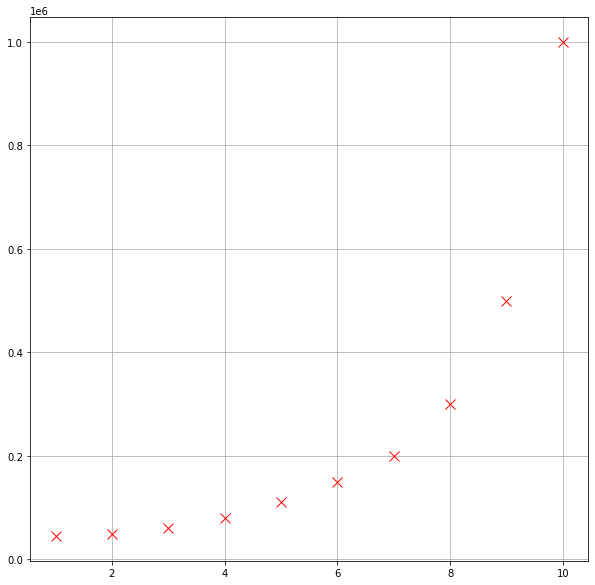

In [15]:
plt.figure(figsize=(10,10))
plt.plot(x,y,'xr', ms=10, label='Datos')
plt.grid()
plt.show()

In [16]:
def min_sq_N(beta, x_points, y_points, N):
    n = len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    
    return (1/(2*n))*((y_points - f_hat_N)**2).sum()

In [17]:
solucion_1 = opt.minimize(fun=min_sq_N, x0=np.zeros(2), args=(x,y,1))
solucion_1

      fun: 13347939401.815567
 hess_inv: array([[ 2.12028224, -0.31700563],
       [-0.31700563,  0.06982665]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 10
     njev: 18
   status: 0
  success: True
        x: array([-195335.27879227,   80878.44283592])

In [18]:
beta_1 = solucion_1.x
beta_1

array([-195335.27879227,   80878.44283592])

In [19]:
solucion_2 = opt.minimize(fun=min_sq_N, x0=np.zeros(3), args=(x,y,2))
solucion_2

      fun: 3379419467.8910313
 hess_inv: array([[ 2.27106554, -2.56893135,  0.27238509],
       [-2.56893135,  2.90851695, -0.30860165],
       [ 0.27238509, -0.30860165,  0.03299478]])
      jac: array([ 0.,  0., 32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 320
      nit: 28
     njev: 77
   status: 2
  success: False
        x: array([ 231894.30839052, -132777.88371148,   19424.82721645])

In [20]:
beta_2 = solucion_2.x
beta_2

array([ 231894.30839052, -132777.88371148,   19424.82721645])

In [21]:
solucion_3 = opt.minimize(fun=min_sq_N, x0=np.zeros(4), args=(x,y,3))
solucion_3

      fun: 757831199.724567
 hess_inv: array([[ 2.03726813e-10, -4.34323854e-11, -3.64021241e-10,
         3.68841647e-11],
       [-4.34323854e-11,  2.06245918e-04, -2.06238227e-04,
         1.67526588e-05],
       [-3.64021241e-10, -2.06238227e-04,  2.06300294e-04,
        -1.67589906e-05],
       [ 3.68841647e-11,  1.67526588e-05, -1.67589906e-05,
         8.82773738e-06]])
      jac: array([ -8.,   0.,  16., 168.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 575
      nit: 20
     njev: 111
   status: 2
  success: False
        x: array([-121436.21315139,  180753.84569131,  -48567.63576551,
          4121.14413944])

In [22]:
beta_3 = solucion_3.x
beta_3

array([-121436.21315139,  180753.84569131,  -48567.63576551,
          4121.14413944])

In [23]:
solucion_4 = opt.minimize(fun=min_sq_N, x0=np.zeros(5), args=(x,y,4))
solucion_4

      fun: 105172203.14176477
 hess_inv: array([[ 1.26990153e+02, -1.37467211e+02,  4.48666745e+01,
        -5.65598738e+00,  2.42285428e-01],
       [-1.37467211e+02,  1.58939001e+02, -5.36427654e+01,
         6.90014768e+00, -2.99587982e-01],
       [ 4.48666745e+01, -5.36427654e+01,  1.85383830e+01,
        -2.42496300e+00,  1.06603139e-01],
       [-5.65598738e+00,  6.90014768e+00, -2.42496300e+00,
         3.21478930e-01, -1.42852705e-02],
       [ 2.42285428e-01, -2.99587982e-01,  1.06603139e-01,
        -1.42852705e-02,  6.40599361e-04]])
      jac: array([ 3.000e+00, -1.000e+00, -3.700e+01, -3.770e+02, -3.507e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 408
      nit: 21
     njev: 66
   status: 2
  success: False
        x: array([ 183937.80940982, -210721.51625368,   94668.34269394,
        -15450.63803307,     889.59802073])

In [24]:
beta_4 = solucion_4.x
beta_4

array([ 183937.80940982, -210721.51625368,   94668.34269394,
        -15450.63803307,     889.59802073])

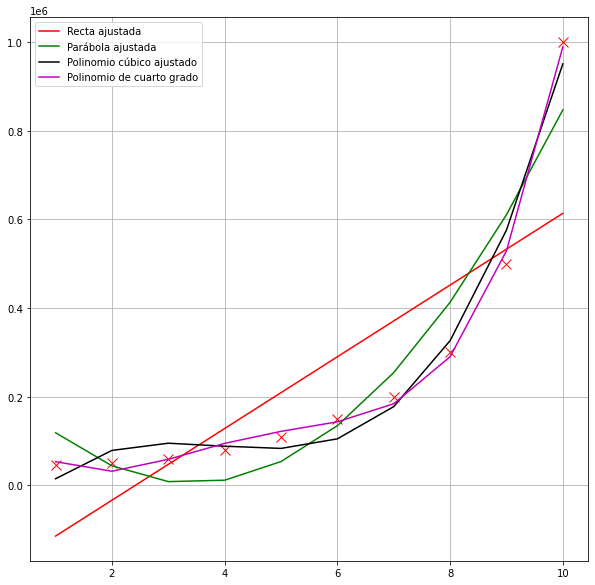

In [25]:
plt.figure(figsize=(10,10))
f_hat_1 = beta_1[0] + beta_1[1]*x
f_hat_2 = beta_2[0] + beta_2[1]*x + beta_2[2]*x**2
f_hat_3 = beta_3[0] + beta_3[1]*x + beta_3[2]*x**2 + beta_3[3]*x**3
f_hat_4 = beta_4[0] + beta_4[1]*x + beta_4[2]*x**2 + beta_4[3]*x**3 + beta_4[4]*x**4
plt.plot(x,y,'xr',ms=10)
plt.plot(x,f_hat_1,'r',ms=3, label=f'Recta ajustada')
plt.plot(x,f_hat_2,'g',ms=3, label=f'Parábola ajustada')
plt.plot(x,f_hat_3,'k',ms=3, label=f'Polinomio cúbico ajustado')
plt.plot(x,f_hat_4,'m',ms=3, label=f'Polinomio de cuarto grado')
plt.legend(loc='best')
plt.grid()
plt.show()

>**2.2.-** Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [26]:
error=[]
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    error.append(solucion.fun)

In [27]:
error

[13347939401.815567,
 3379419467.8910313,
 757831199.724567,
 105172203.14176477,
 8191142.222944763,
 2037735.5794168548,
 1409198.9581508387,
 1460573.837787781,
 146215506.09698248]

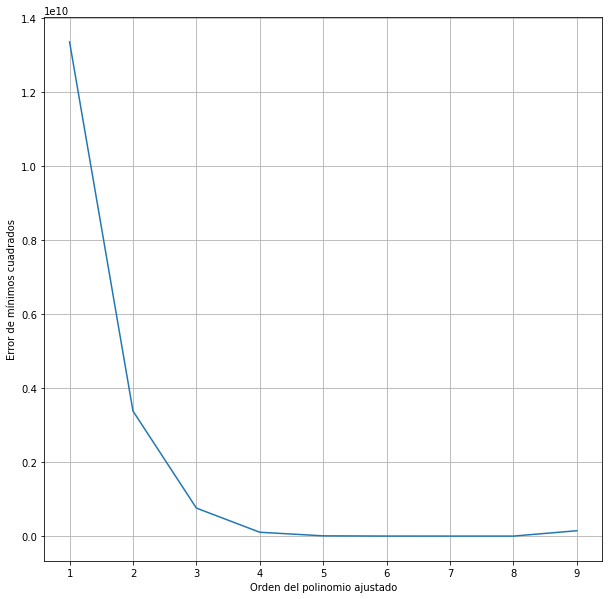

In [28]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10), error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error de mínimos cuadrados')
plt.grid()
plt.show()

<hr>   

### Reactivo 3 (4 ptos) <a name="Problema3"></a> 


Considere un cono circular recto inscrito en una esfera de radio $r$

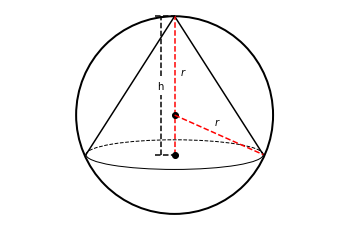

In [29]:
#Ejecute esta linea de código
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

>**3.1.-** Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. 


El volumen de un cono está representado por:

$ V = \frac{ \pi r^2 h }{ 3 }$

$R$ radio de la esfera, $r$ radio del cono

El radio de la esfera es de 2, por lo tanto $R=2$

Tenemos un trángulo rectángulo en el que $R$ es la hipotenusa y r es la base, también podemos ver que la alturá será de h-r

Mediante el teorema de pitágoras obtenemos que $r^2 = R^2 - (h-R)^2$

Sustituímos $r^2$ en la fórmula de volumen y obtenemos que $V = \frac{\pi (R^2 - (h-R)^2)h}{3}$ y como $R=2$, $V = \frac{1}{3} \pi(4h^2-h^3)$, así llegamos a nuestra fórmula final a maximizar



>**3.2.-** Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$. 


In [30]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [31]:
sym.var('h')

h

In [32]:
def V(h):
    return (sym.pi*(4*h**2-h**3))/3
V(h)

pi*(-h**3 + 4*h**2)/3

In [33]:
dV = sym.diff(V(h),h)
dV

pi*(-3*h**2 + 8*h)/3

In [34]:
sol = sym.solve(dV,h)
sol

[0, 8/3]

In [35]:
sol[1]

8/3

In [38]:
xnum = np.linspace(0,3,200)
xnum

array([0.        , 0.01507538, 0.03015075, 0.04522613, 0.06030151,
       0.07537688, 0.09045226, 0.10552764, 0.12060302, 0.13567839,
       0.15075377, 0.16582915, 0.18090452, 0.1959799 , 0.21105528,
       0.22613065, 0.24120603, 0.25628141, 0.27135678, 0.28643216,
       0.30150754, 0.31658291, 0.33165829, 0.34673367, 0.36180905,
       0.37688442, 0.3919598 , 0.40703518, 0.42211055, 0.43718593,
       0.45226131, 0.46733668, 0.48241206, 0.49748744, 0.51256281,
       0.52763819, 0.54271357, 0.55778894, 0.57286432, 0.5879397 ,
       0.60301508, 0.61809045, 0.63316583, 0.64824121, 0.66331658,
       0.67839196, 0.69346734, 0.70854271, 0.72361809, 0.73869347,
       0.75376884, 0.76884422, 0.7839196 , 0.79899497, 0.81407035,
       0.82914573, 0.84422111, 0.85929648, 0.87437186, 0.88944724,
       0.90452261, 0.91959799, 0.93467337, 0.94974874, 0.96482412,
       0.9798995 , 0.99497487, 1.01005025, 1.02512563, 1.04020101,
       1.05527638, 1.07035176, 1.08542714, 1.10050251, 1.11557

In [39]:
ynum = V(xnum)
ynum

array([0, 0.000301880605776287*pi, 0.00120295424243766*pi,
       0.0026963686389829*pi, 0.00477527152441077*pi,
       0.00743281062772005*pi, 0.0106621336779095*pi,
       0.0144563884039779*pi, 0.0188087225349241*pi,
       0.0237122837997467*pi, 0.0291602199274446*pi,
       0.0351456786470166*pi, 0.0416618076874613*pi,
       0.0487017547777777*pi, 0.0562586676469644*pi,
       0.0643256940240202*pi, 0.072895981637944*pi, 0.0819626782177345*pi,
       0.0915189314923904*pi, 0.10155788919091*pi, 0.112072699042294*pi,
       0.123056508775538*pi, 0.134502466119644*pi, 0.146403718803609*pi,
       0.158753414556432*pi, 0.171544701107111*pi, 0.184770726184647*pi,
       0.198424637518036*pi, 0.212499582836279*pi, 0.226988709868374*pi,
       0.24188516634332*pi, 0.257182099990115*pi, 0.272872658537758*pi,
       0.288949989715249*pi, 0.305407241251585*pi, 0.322237560875766*pi,
       0.33943409631679*pi, 0.356989995303656*pi, 0.374898405565364*pi,
       0.393152474830911*pi, 0.411745

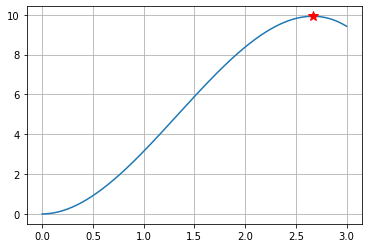

In [40]:
plt.plot(xnum,ynum)
plt.plot(sol[1],V(sol[1]), '*r',ms=10)
plt.grid()

* Para maximizar el volumen h tiene que ser igual a $\frac{8}{3}$

>**3.3.-** ¿Cuál es el volumen máximo del cono?

In [41]:
V(sol[1])

256*pi/81

* El volumen máximo del cono puede ser $\frac{256\pi}{81}$